In [279]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [280]:
df=pd.read_csv("world_happiness.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [281]:
df.shape

(158, 12)

We have 158 rows and 12 columns in the dataset. Our target variable is Happiness Score.

In [282]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We have two independent variables with string values. Happiness Rank is of integer value type and rest independent variables are of float type. Our dependent variable Happiness Score is of float datatype.

In [283]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values in the dataset.

In [284]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

Here, we see that Country has 158 unique values which is same as the number of rows in our dataset. So there is no category in the Country feature whereas, we have 10 unique categories for the Region feature.

In [285]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

These are the Region feature categories. 'Sub-Saharan Africa' and 'Central and Eastern Europe' regions are occuring frequently while 'Australia and New Zealand' and 'North America' occur rarely.

In [286]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# EDA

## Univariate Analysis:

Text(0.5, 1.0, 'Cardinality of Region column')

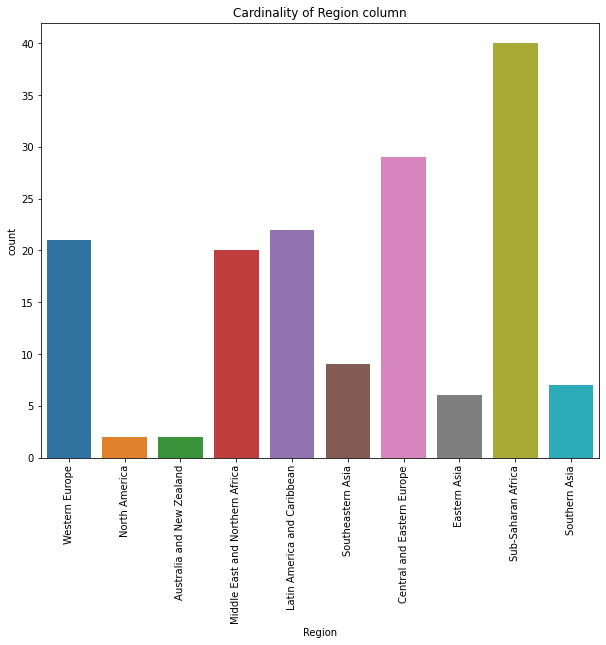

In [287]:
plt.figure(figsize=(10,8))
sns.countplot(df['Region'])
plt.xticks(rotation = 90)
plt.title('Cardinality of Region column')

Here, we can see 'Region' feature has imbalanced categories.

Country
Switzerland    7.587
Iceland        7.561
Denmark        7.527
Norway         7.522
Canada         7.427
Name: Happiness Score, dtype: float64


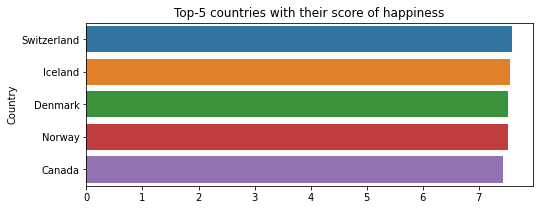

In [288]:
top_countries=df.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False).head()
print(top_countries)

plt.figure(figsize=(8, 3))
sns.barplot(top_countries.values, top_countries.index).set_title('Top-5 countries with their score of happiness')
plt.show()

Above are the top countries with highest Happiness Score

Country
Rwanda     3.465
Benin      3.340
Syria      3.006
Burundi    2.905
Togo       2.839
Name: Happiness Score, dtype: float64


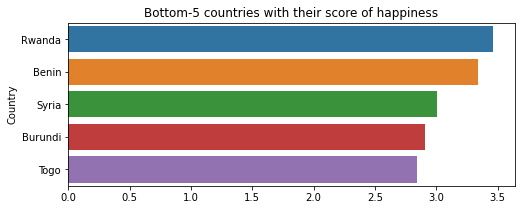

In [289]:
top_countries=df.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False).tail()
print(top_countries)

plt.figure(figsize=(8, 3))
sns.barplot(top_countries.values, top_countries.index).set_title('Bottom-5 countries with their score of happiness')
plt.show()

Above are the bottom 5 countries with least Happiness Score.

<AxesSubplot:xlabel='Happiness Score'>

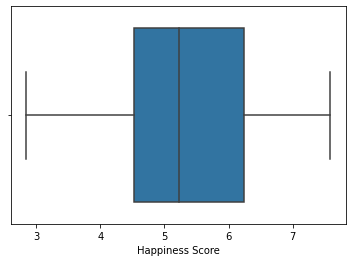

In [290]:
sns.boxplot(df['Happiness Score'])

<AxesSubplot:xlabel='Standard Error'>

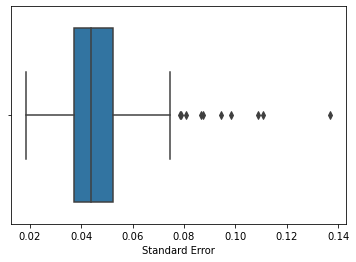

In [291]:
sns.boxplot(df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

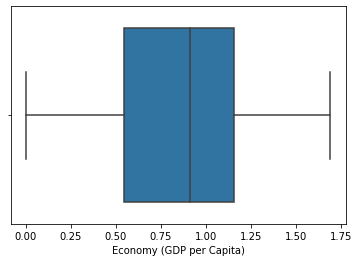

In [292]:
sns.boxplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family'>

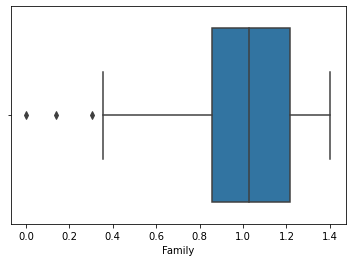

In [293]:
sns.boxplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)'>

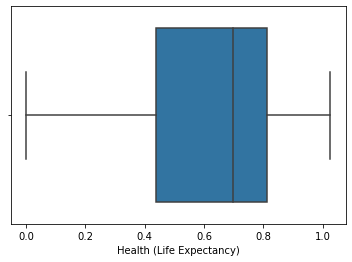

In [294]:
sns.boxplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom'>

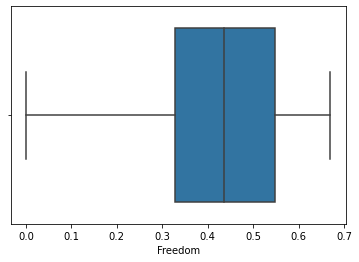

In [295]:
sns.boxplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)'>

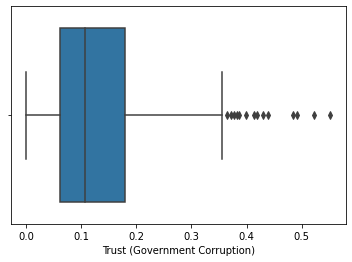

In [296]:
sns.boxplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity'>

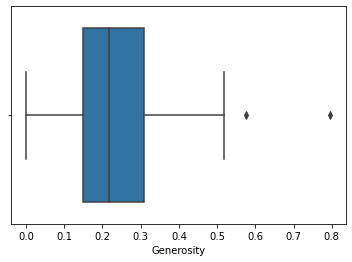

In [297]:
sns.boxplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual'>

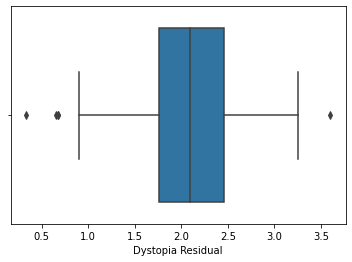

In [298]:
sns.boxplot(df['Dystopia Residual'])

From the above boxplots we can conclude that, there are outliers in 'Standard Error' and 'Trust (Government Corruption)' feature whereas very few in 'Family', 'Generosity' and 'Dystopia Residual'.

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

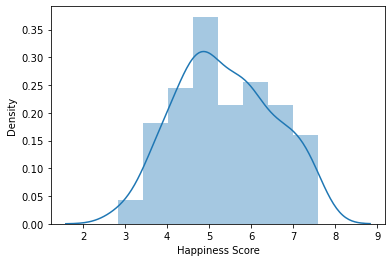

In [299]:
sns.distplot(df['Happiness Score'])

'Happiness Score' is not normally distributed.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

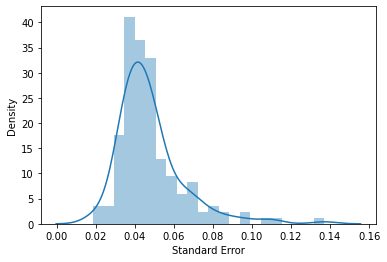

In [300]:
sns.distplot(df['Standard Error'])

'Standard Error' feature has right skewness.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

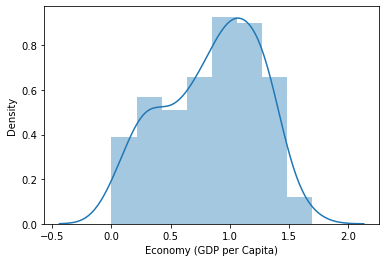

In [301]:
sns.distplot(df['Economy (GDP per Capita)'])

'Economy (GDP per Capita)' has a little bit of skewness.

<AxesSubplot:xlabel='Family', ylabel='Density'>

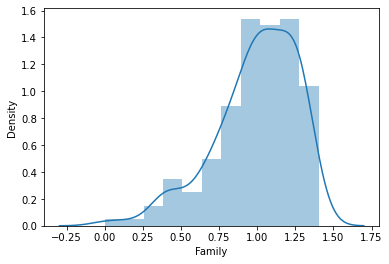

In [302]:
sns.distplot(df['Family'])

'Family' feature is left skewed.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

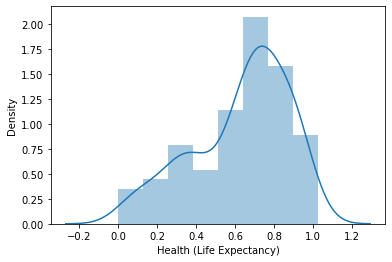

In [303]:
sns.distplot(df['Health (Life Expectancy)'])

'Health (Life Expectancy)' feature is left skewed.

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

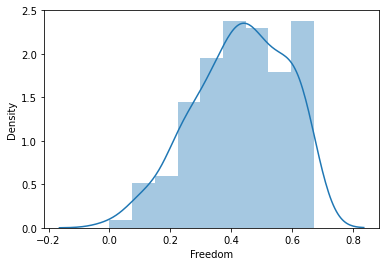

In [304]:
sns.distplot(df['Freedom'])

'Freedom' feature is little bit left skewed.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

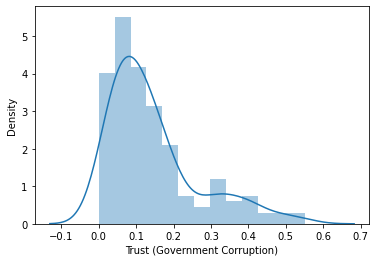

In [305]:
sns.distplot(df['Trust (Government Corruption)'])

'Trust (Government Corruption)' is right skewed.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

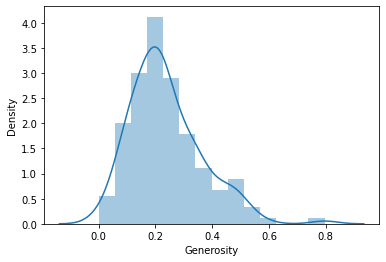

In [306]:
sns.distplot(df['Generosity'])

'Generosity' feature is little bit right skewed.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

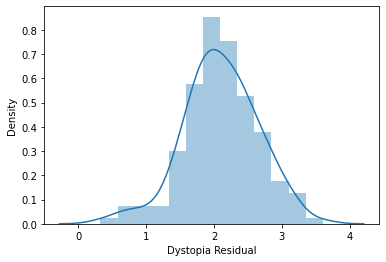

In [307]:
sns.distplot(df['Dystopia Residual'])

'Dystopia Residual' feature is normally distributed.

## Bivariate Analysis:

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

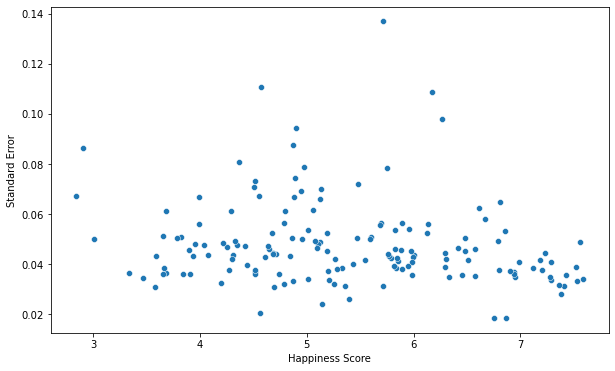

In [308]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Happiness Score',y="Standard Error",data=df)

In the above scatterplot, we find no relationship between Standard Error and Happiness Score.

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

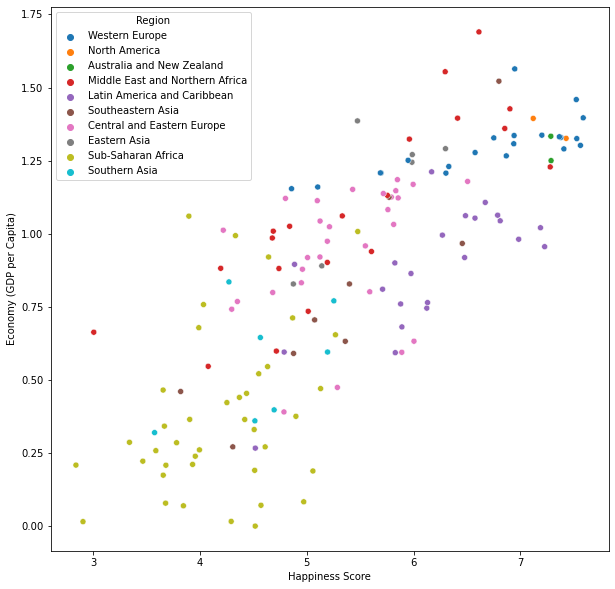

In [309]:
plt.figure(figsize=[10,10])
sns.scatterplot(x="Happiness Score",y="Economy (GDP per Capita)",data=df,hue="Region")

The above scatterplot shows that there is a positive relationship between Happiness Score and Economy (GDP per Capita) that is as the Economy of a country increases, Happiness Score of that country also increases.

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

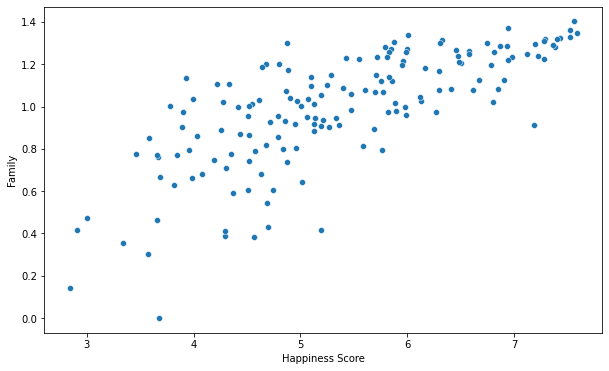

In [310]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Happiness Score',y="Family",data=df)

In the above scatterplot, we can see that there is a postive relationship between Happiness Score and Family. That means having family around them increases their Happiness Score. However, there are few outliers present.

<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

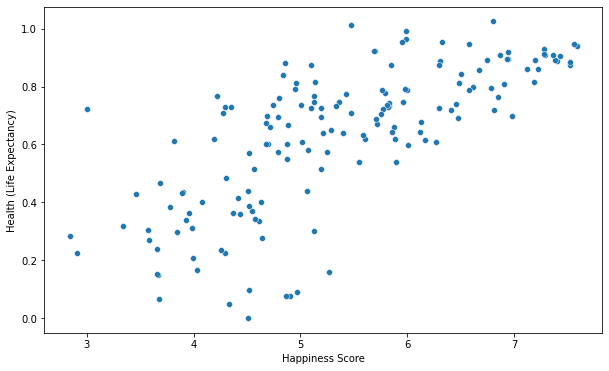

In [311]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Happiness Score',y="Health (Life Expectancy)",data=df)

Here we see that, there is a positive relationship between Happiness Score and Health of people. Few outliers are present.

<AxesSubplot:xlabel='Happiness Score', ylabel='Freedom'>

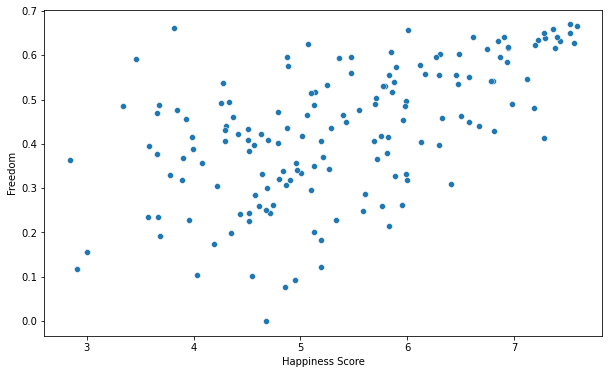

In [312]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Happiness Score',y="Freedom",data=df)

Above scatterplot shows that Happiness Score and Freedom are positively related with each other. 

<AxesSubplot:xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

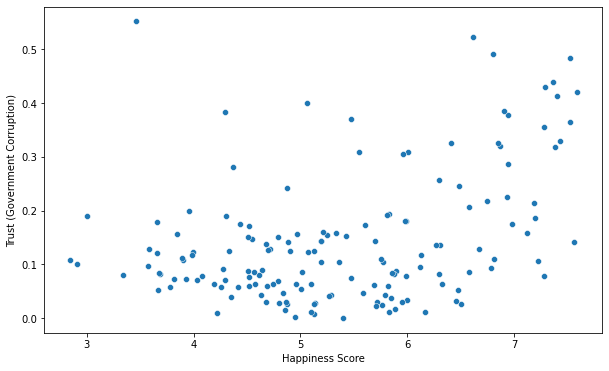

In [313]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Happiness Score',y="Trust (Government Corruption)",data=df)

Here we see that there is no relationship between Happiness Score and Corruption. However, there are many outliers present.

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

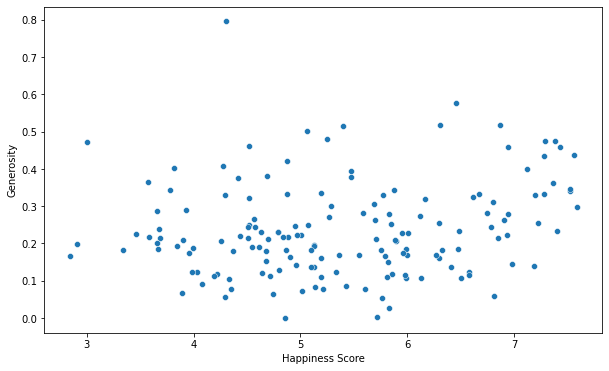

In [314]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Happiness Score',y="Generosity",data=df)

We find no relationship between Happiness Score and Generosity.

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

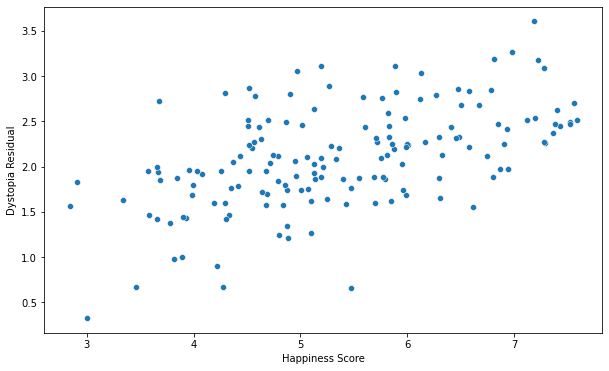

In [315]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Happiness Score',y="Dystopia Residual",data=df)

We find no relationship between Happiness Score and Dystopia Residual.

## Multivariate Analysis:

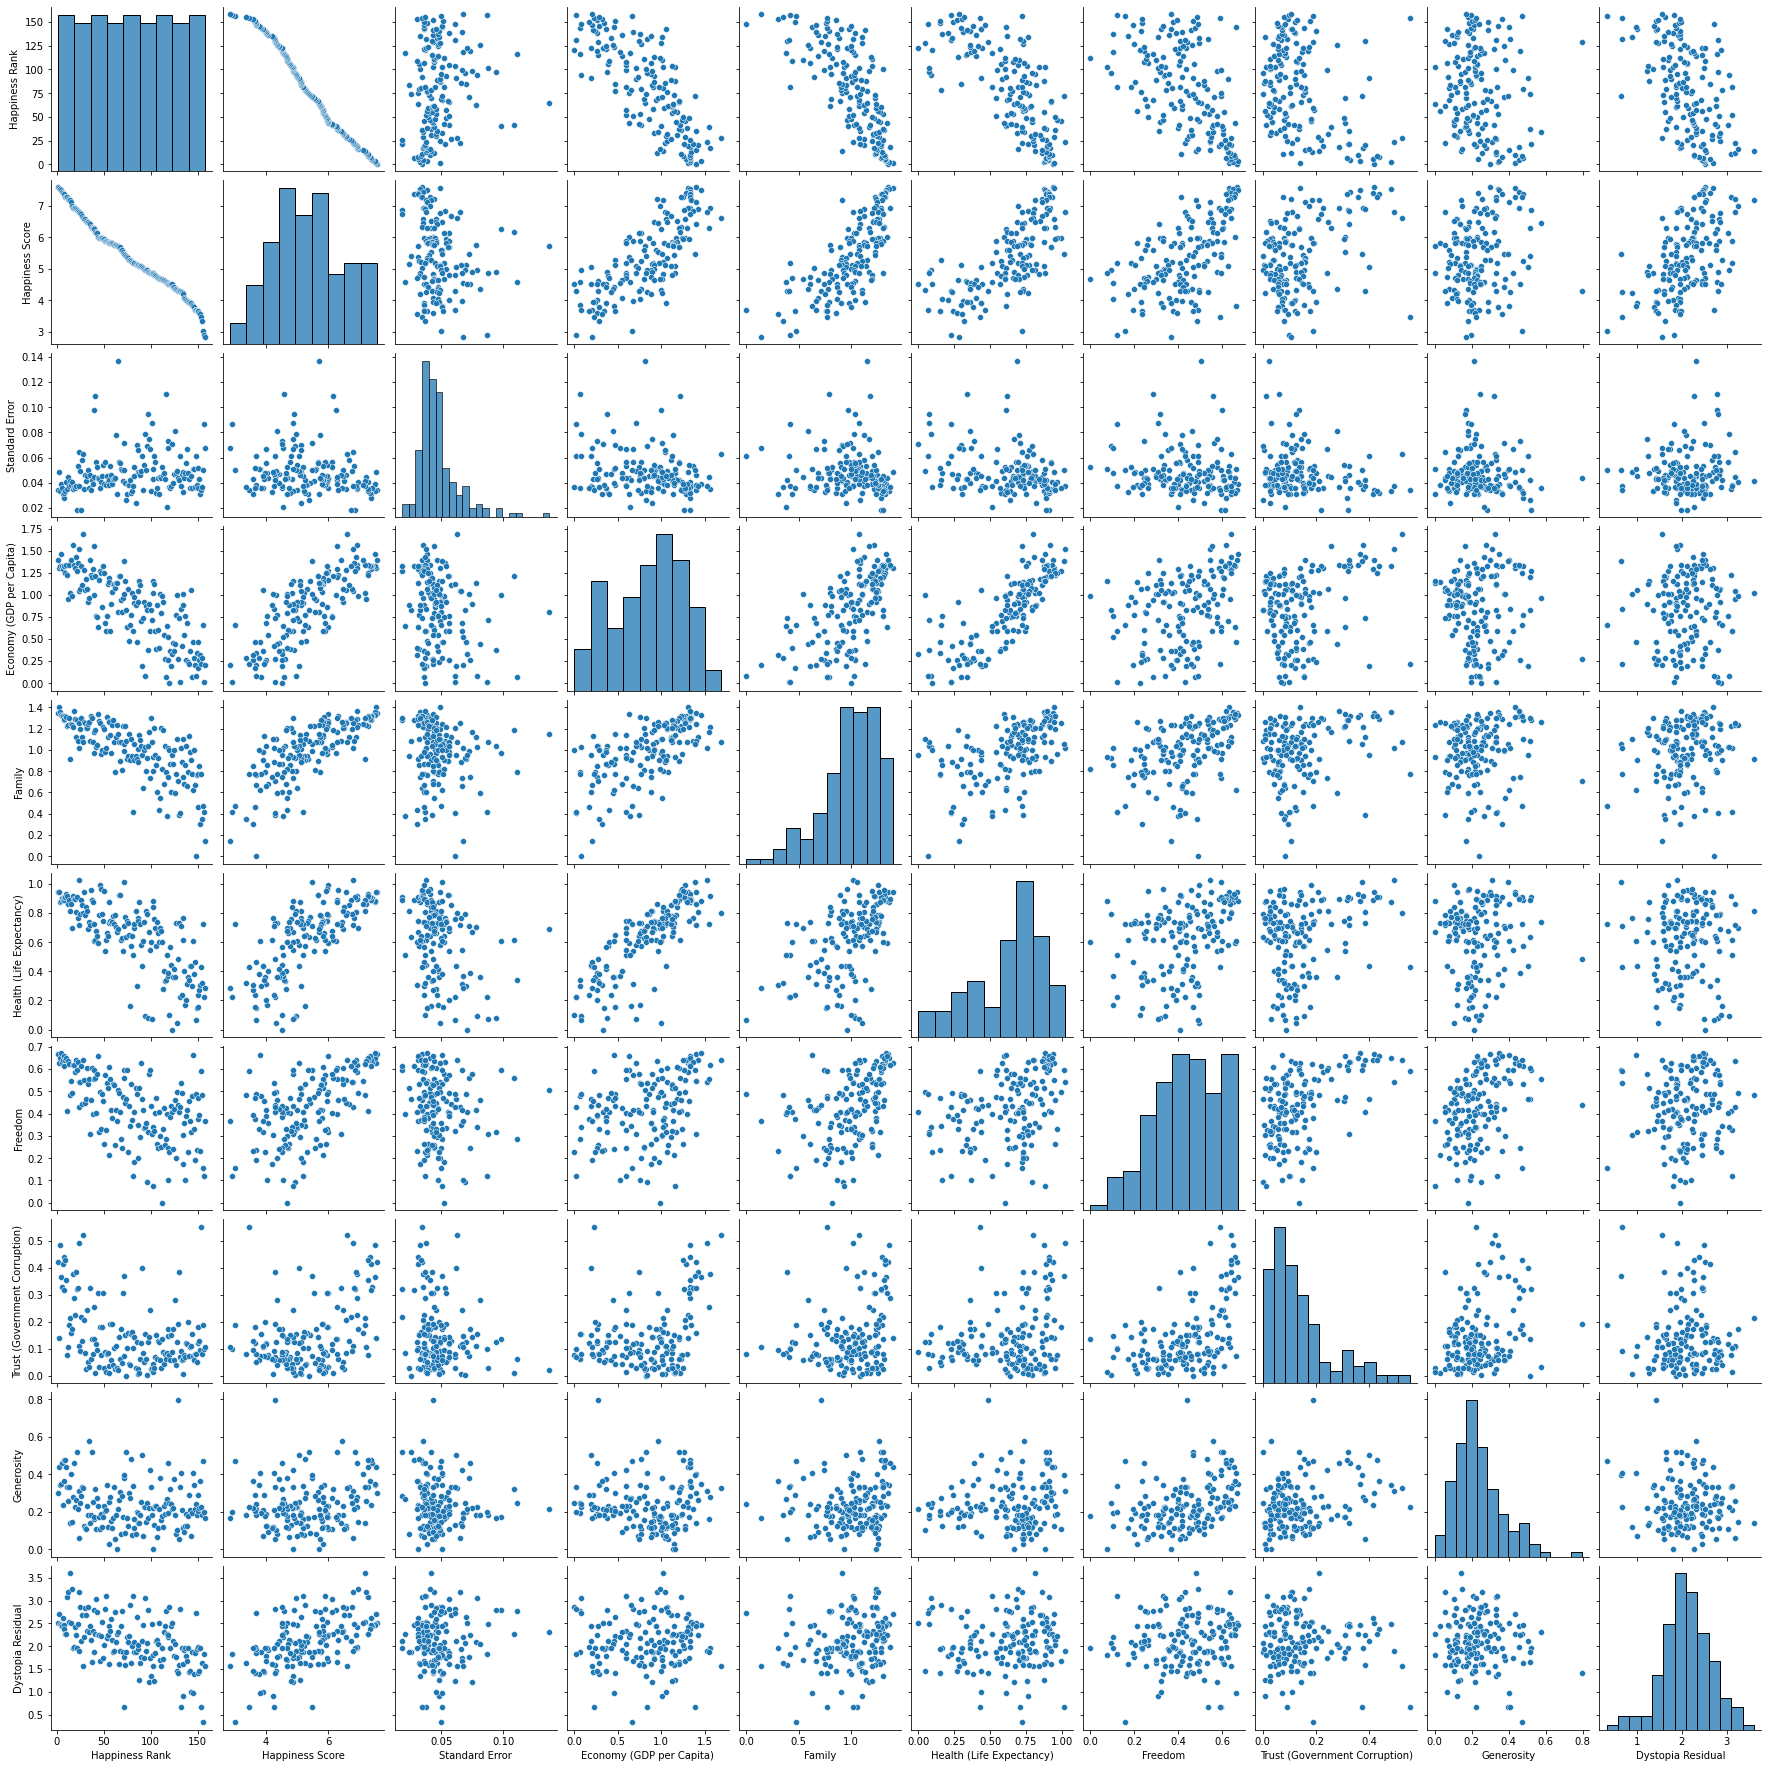

In [316]:
sns.pairplot(df)

Above pairplot shows that our target variable that is "Happiness Score" shows positive relationship with all almost all features except for a few which show no relationship. Negative realtionship with Happiness Rank, as the country with Rank 1 has highest Happiness Score.

<AxesSubplot:>

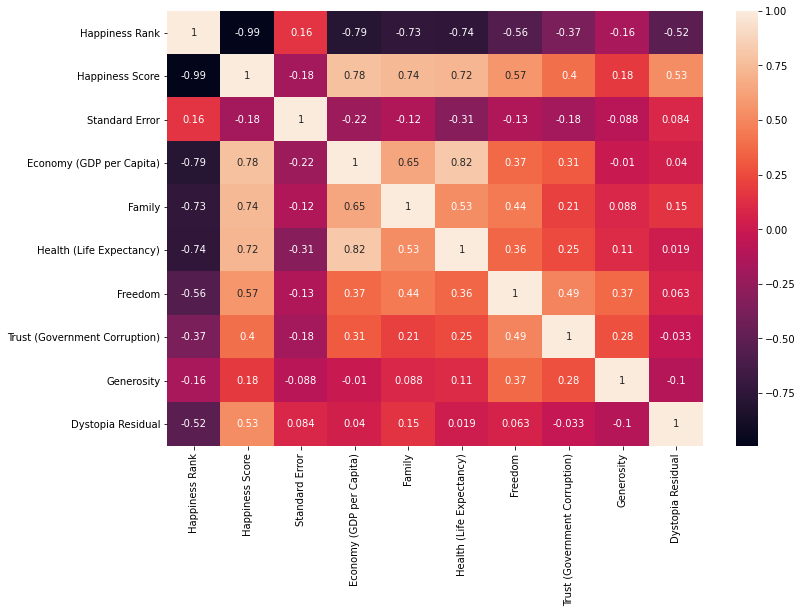

In [317]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

From the above heatmap, we can conclude that Happiness Score has highest positive correlation with Economy, Health, Freedom and Dystopia whereas least positive correlation with Corruption and Generosity. Negative correlation with Happiness Rank and Standard Error.

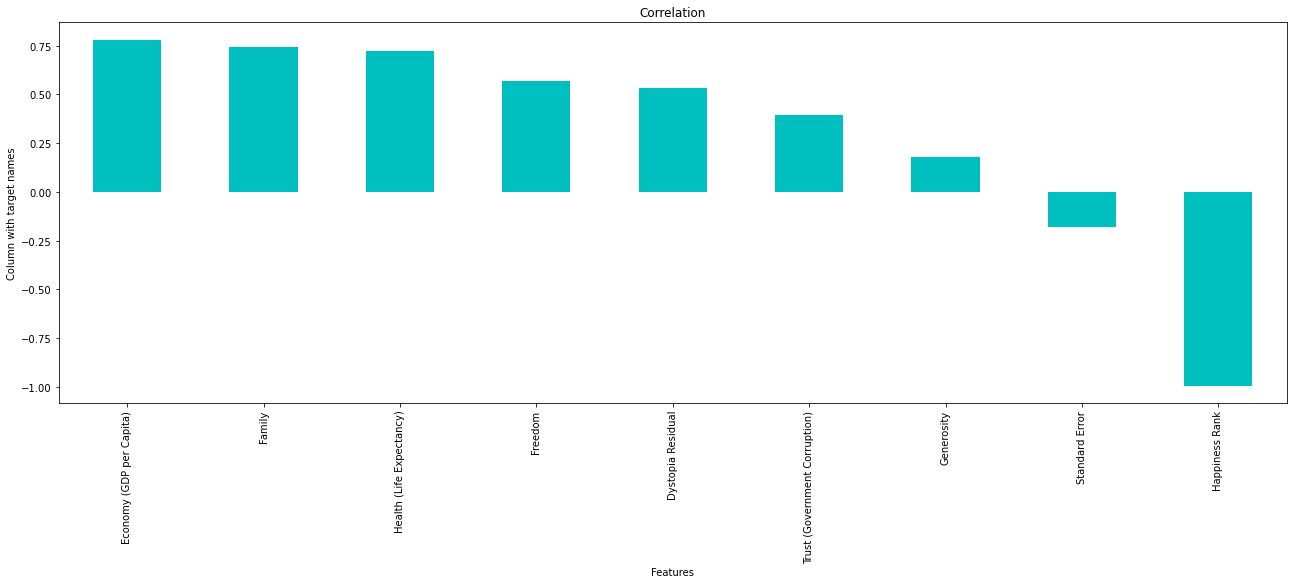

In [318]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

### Label Encoding

As we have noted, Country feature has unique 158 values and it seems that it is no where a contributing factor to increase Happiness Score. We can think of dropping it. First lets convert both object type features Country and Region to int type.

In [319]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [320]:
df['Region']=LE.fit_transform(df['Region'])
df['Country']=LE.fit_transform(df['Country'])

Here, we converted column Region and Country from object to int type.

In [321]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:xlabel='Happiness Score', ylabel='Country'>

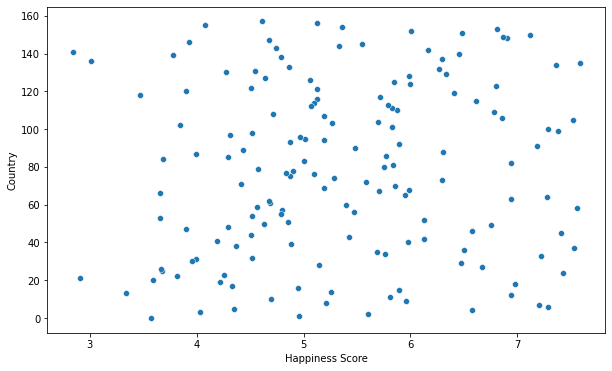

In [322]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Happiness Score',y="Country",data=df)

Here, we see that there is no relationship between Happiness Score and Country. So we can drop it.

In [323]:
#Dropping Country and Happiness Rank
print(df.shape)
df.drop(['Country','Happiness Rank'],axis=1,inplace=True)
df.shape

(158, 12)


(158, 10)

### Outlier Removal

In [324]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [325]:
numeric_features=['Happiness Score','Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

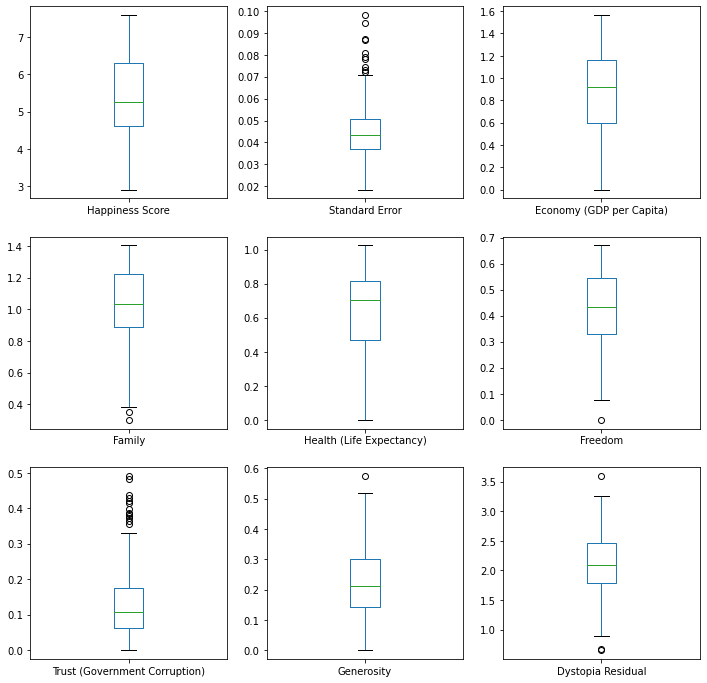

In [326]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df_new[i].plot(kind="box",ax=ax[row,col])
    col += 1

Even after removing outliers, there are some present.

In [327]:
df_new.shape

(149, 10)

After removing we have 149 rows and 10 columns.

### Percentage of data loss:

In [328]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

5.70 %


There is 5.70% of data loss with the outlier removal. To some extent outliers are removed.

### Checking and Removing Skewness

In [329]:
df.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

This is the skewness before removing outliers.

In [330]:
df_new.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

After Removing Outliers, Skewness is also reduced but not completely.

### Removing skewness

In [331]:
from sklearn.preprocessing import PowerTransformer

In [332]:
PT=PowerTransformer()
data_PT=PT.fit_transform(df_new)
df_no_skew=pd.DataFrame(data_PT,columns=df_new.columns)

Since negative skewness is present, we cannot use log transformation. Hence, we used Power Transformer.

In [333]:
df_no_skew.skew()

Region                          -0.222589
Happiness Score                 -0.017940
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
dtype: float64

In [334]:
#df = df_no_skew.sample(frac = 1)

In [335]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Creating X and Y Split

In [336]:
x=df.drop("Happiness Score",axis=1)
y=df["Happiness Score"]

### Scaling

Even though there is not much need of scaling, there is a difference between Standard Error and Dystopia Residual features hence we are scaling the values.

In [337]:
from sklearn.preprocessing import MinMaxScaler

In [338]:
MMS=MinMaxScaler()
x_scaled=MMS.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.000000,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,1.000000,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,1.000000,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,1.000000,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.555556,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584


Now, all the features values are scaled and the model building will not be biased.

As we have only 9 features in our dataset, we will not perform PCA.

# Building the Model

### Creating train_test_split

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Finding the Best Random State

In [340]:
from sklearn.tree import DecisionTreeRegressor
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.9052505774164842  on Random State  26


Using the best Random State to create new train_test_split.

In [341]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [342]:
#Importing the algorithmns to build models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### 1. LinearRegression

In [343]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 0.0002506441074950627
Mean squared error: 8.672306872616239e-08
Root Mean squared error: 0.0002944878074320945
R2 Score: 0.9999999417867279


### 2. Support Vector Regression

In [344]:
SV=SVR()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 0.12278451049200796
Mean squared error: 0.03141695033733106
Root Mean squared error: 0.1772482731575432
R2 Score: 0.978911222739252


### 3. RandomForestRegressor

In [345]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 0.3002083333333335
Mean squared error: 0.14493713778750014
Root Mean squared error: 0.3807061042162315
R2 Score: 0.9027102572722027


### 4. DecisionTreeRegressor

In [346]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 0.5867291666666666
Mean squared error: 0.5159335624999998
Root Mean squared error: 0.7182851540300689
R2 Score: 0.6536771435775524


Here, we observe that LinearRegression is giving the highest R2 score of 99%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [347]:
from sklearn.model_selection import cross_val_score

In [348]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.9999982064667714


In [349]:
print(cross_val_score(SV,x,y,cv=6,scoring="neg_mean_squared_error").mean())

-0.16879658603783135


In [350]:
print(cross_val_score(RFR,x,y,cv=5,scoring="neg_mean_squared_error").mean())

-0.45718784397627044


In [351]:
print(cross_val_score(DTR,x,y,cv=5,scoring="neg_mean_squared_error").mean())

-0.5873074010080644


By performing cross validation score, I found negative score values for 3 models. Tried shuffling the data manually and tuning the scoring parameter. Only for LinearRegression we are getting expected cross validation score. Therefore, we can conclude here that our Linear Regression is the best model for the dataset.

# Hyper Parameter Tuning

Now, let's apply Hyper Paramter Tuning on the best model to improve the r2 score.

In [352]:
from sklearn.model_selection import GridSearchCV

In [353]:
parameters ={'fit_intercept':['True','False'],
            'normalize':['True','False'],
            'n_jobs':[4,5,6,7],
            'copy_X':['True','False']}

In [354]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [355]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [4, 5, 6, 7],
                         'normalize': ['True', 'False']})

In [356]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 4, 'normalize': 'True'}

In [357]:
Final_mod=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=4,normalize=True)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

99.9999941786728


After Hyper Parameter tuning, the improved score of the best model Linear Regression is 99.99%

# Saving the Model

In [359]:
import joblib
joblib.dump(Final_mod,"Final_Happiness_Model.pkl")

['Final_Happiness_Model.pkl']